In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns

In [2]:
from dishpylib.pyanalysis import tee_plot

# get data

In [3]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/stage=8+what=elaborated/',
)

In [4]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

'581a93929506b064'

In [5]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

# how does fitness complexity change over time?

outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fitness-complexity+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fitness-complexity+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fitness Complexity'>

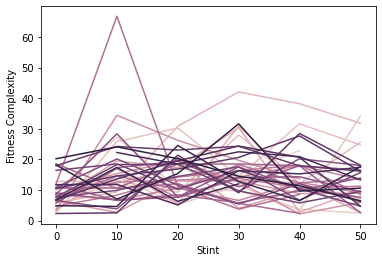

In [6]:
tee_plot(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Fitness Complexity',
    hue='Series',
    legend=False,
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=identity+viz=hline-swarmplot-boxplot+x=stint+y=fitness-complexity-delta+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=hline-swarmplot-boxplot+x=stint+y=fitness-complexity-delta+_dfdigest=581a93929506b064+ext=.png


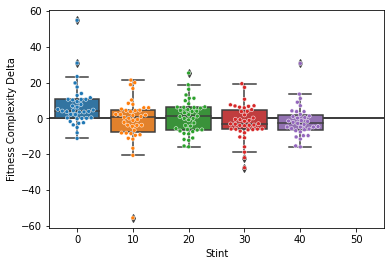

In [7]:
def hline_swarmplot_boxplot(*args, **kwargs):
    plt.axhline(
        0,
        c='k',
        zorder=-1,
    )
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    hline_swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Fitness Complexity Delta',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=identity+viz=hline-barplot+x=stint+y=fitness-complexity-delta+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=hline-barplot+x=stint+y=fitness-complexity-delta+_dfdigest=581a93929506b064+ext=.png


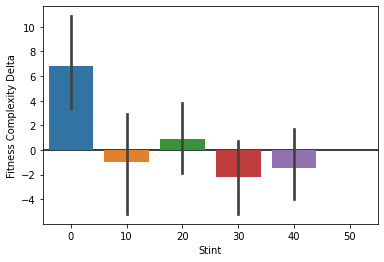

In [8]:
def hline_barplot(*args, **kwargs):
    plt.axhline(
        0,
        c='k',
        zorder=-1,
    )
    sns.barplot(
        *args,
        **kwargs,
    )
    
tee_plot(
    hline_barplot,
    data=df,
    x='Stint',
    y='Fitness Complexity Delta',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fitness-complexity+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fitness-complexity+_dfdigest=581a93929506b064+ext=.png


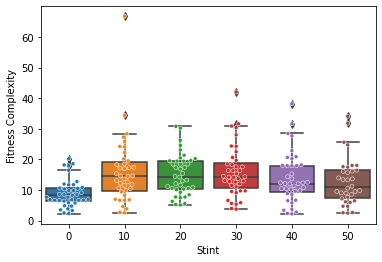

In [9]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Fitness Complexity',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=filter-Series-40+viz=lmplot+x=fitness-complexity+y=fitness-complexity-delta-sign+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=filter-Series-40+viz=lmplot+x=fitness-complexity+y=fitness-complexity-delta-sign+_dfdigest=581a93929506b064+ext=.png


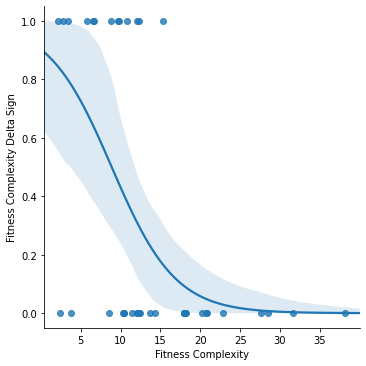

In [10]:
tee_plot(
    sns.lmplot,
    data=df40,
    x='Fitness Complexity',
    y='Fitness Complexity Delta Sign',
    logistic=True,
    truncate=False,
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Series-40',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=identityline-regplot+x=fitness-complexity+y=fitness-complexity-delta+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=identityline-regplot+x=fitness-complexity+y=fitness-complexity-delta+_dfdigest=581a93929506b064+ext=.png


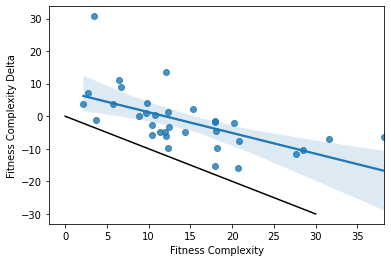

In [11]:
def identityline_regplot(*args, **kwargs):
    sns.regplot(
        *args,
        **kwargs,
    )
    plt.plot(
        [0,30],
        [0,-30],
        c='k',
    )

tee_plot(
    identityline_regplot,
    data=df40,
    x='Fitness Complexity',
    y='Fitness Complexity Delta',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)    